In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks , peak_prominences

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Input,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import petname
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [ ]:
pip install petname

  Preparing metadata (setup.py) ... done
  Created wheel for petname: filename=petname-2.6-py3-none-any.whl size=8120 sha256=05328359ef95e189bbe4e061ecc6fc563bbe759885735ac4bb2c0398de1d3f3b
  Stored in directory: /root/.cache/pip/wheels/a6/ea/67/b3166a5d29acff7207c1a19b4bc315b8bc4d58b46a6540ac7c
Successfully built petname


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

from tensorflow.keras.layers import Dense, LeakyReLU, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
import petname



In [ ]:
import scipy.io


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/ChatterDetection/

/content/drive/MyDrive/ChatterDetection


In [ ]:
data = scipy.io.loadmat('1201-130-non_norm-shuffled.mat')
#TrainingDataandLabels.mat
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Apr 21 14:43:43 2022',
 '__version__': '1.0',
 '__globals__': [],
 'shuffled': array([[-0.69854227,  1.96451214, -0.44032254, ...,  0.30546336,
         -0.83412373,  0.35606482],
        [-1.19331212,  1.96451214, -0.87998131, ..., -0.09144186,
         -0.95143245, -0.09606861],
        [-0.86750664,  0.54699163, -1.39032985, ...,  0.39454301,
         -0.11457563,  0.15705583],
        ...,
        [-1.10604802, -0.55083754, -0.79511844, ..., -1.28075191,
         -0.93743505, -0.88449093],
        [-0.94387737, -1.36221792, -1.12765906, ...,  0.05626287,
         -0.21396299, -0.88454949],
        [-0.74041732, -1.90524657, -1.02698324, ..., -1.22417667,
         -0.91541404, -0.37256109]]),
 'shuffled_labels': array([[1, 2, 1, ..., 2, 1, 2]], dtype=uint8)}

In [ ]:
x = data['shuffled']
print(x.shape)
y = data ["shuffled_labels"]
print(y.shape)

(1201, 1906)
(1, 1906)


In [ ]:
#data = scipy.io.loadmat('1201-130-non_norm-shuffled.mat')
#TrainingDataandLabels.mat
x = data['flow']
print(x.shape)
y = data ["labels"]
print(y.shape)


In [ ]:
x_transposed = np.transpose(x)
y_transposed = np.transpose(y)
df1 = pd.DataFrame(x_transposed)
df2 = pd.DataFrame(y_transposed, columns = ["Labels"])

In [ ]:
dff = pd.concat([df1, df2], axis=1)
dff

,0,1,2,3,4,5,6,7,8,9,...,1192,1193,1194,1195,1196,1197,1198,1199,1200,Labels
0,-0.698542,-1.193312,-0.867507,-0.886248,-0.955708,-0.759861,-0.944170,-1.113720,-0.802498,-0.932223,...,-0.831020,-1.367196,-0.834241,-0.679332,-1.297560,-0.769876,-1.106048,-0.943877,-0.740417,1
1,1.964512,1.964512,0.546992,1.700166,0.770071,0.189443,1.074559,0.872094,1.964512,1.964512,...,0.449947,1.832175,0.281920,0.485907,0.951745,-0.864637,-0.550838,-1.362218,-1.905247,2
2,-0.440323,-0.879981,-1.390330,-0.404773,-1.141422,-1.184586,-0.885721,-0.714472,-1.309450,-0.559037,...,-0.869966,-1.000277,-1.215919,-0.793244,-1.129650,-1.073602,-0.795118,-1.127659,-1.026983,1
3,-0.866218,1.066887,1.964512,-0.540120,1.284461,1.076257,-0.136011,1.964512,1.964512,1.964512,...,-0.670020,0.624944,-0.382986,-0.043652,0.696336,0.500548,0.325493,-0.118792,-0.206291,2
4,-1.068038,-0.647355,-0.524248,-1.091406,-0.529109,-0.892456,-0.905633,-0.737430,-1.092636,-0.799394,...,0.390595,-0.453734,-0.828970,-1.509044,-0.539886,-1.258321,-1.009238,-0.808764,-1.051113,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,0.117641,0.469391,0.342770,-0.341521,0.926854,-0.920919,0.050406,0.326079,-0.284477,0.203558,...,-0.565713,0.475716,-0.250391,-0.066551,-0.122131,-0.881504,-0.463573,-0.793479,-1.038169,2
1902,-0.847535,-0.517982,-0.913306,-0.793420,-0.659947,-0.906863,-0.686126,-0.706273,-0.862938,-0.530222,...,-0.470836,-0.282134,-1.854352,-0.014954,-0.390248,-1.576981,-0.256424,-0.542697,-1.189798,1
1903,0.305463,-0.091442,0.394543,-0.283364,-0.233876,-0.323072,-0.199614,0.156763,0.165079,0.314600,...,-0.834007,0.245257,0.117582,-0.620883,0.603391,-0.494262,-1.280752,0.056263,-1.224177,2
1904,-0.834124,-0.951432,-0.114576,-1.186108,-0.798164,-0.098001,-1.452235,-0.555230,-0.615963,-1.042562,...,-0.927479,-0.737020,-0.558627,-0.869908,-0.521437,-0.856320,-0.937435,-0.213963,-0.915414,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(dff,  test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_stable = StandardScaler()
scaler_chatter = StandardScaler()

X_train_stable_sc = scaler_stable.fit_transform(X_train[X_train["Labels"]==1].iloc[:,0:1201])
X_train_chatter_sc = scaler_chatter.fit_transform(X_train[X_train["Labels"]==2].iloc[:,0:1201])

X_test_stable_sc = scaler_stable.transform(X_test[X_test["Labels"]==1].iloc[:,0:1201])
X_test_chatter_sc = scaler_chatter.transform(X_test[X_test["Labels"]==2].iloc[:,0:1201])


In [ ]:
scaler = StandardScaler()
X_train_s = scaler_stable.fit_transform(X_train.iloc[:,0:1201])
X_test_s = scaler_stable.transform(X_test.iloc[:,0:1201])

In [ ]:
XtrainS = pd.DataFrame(X_train_s)
XtrainS["Labels"] = X_train["Labels"].to_list()

XtestS = pd.DataFrame(X_test_s)
XtestS["Labels"] = X_test["Labels"].to_list()

In [ ]:
X_test_chatter_o = XtestS[XtestS["Labels"]==2].iloc[:,0:1201]
X_test_stable_o = XtestS[XtestS["Labels"]==1].iloc[:,0:1201]

X_train_chatter_o = XtrainS[XtrainS["Labels"]==2].iloc[:,0:1201]
X_train_stable_o = XtrainS[XtrainS["Labels"]==1].iloc[:,0:1201]

In [ ]:
X_train_stable = X_train[X_train["Labels"]==1].iloc[:,0:1201]
X_train_chatter = X_train[X_train["Labels"]==2].iloc[:,0:1201]

X_test_stable = X_test[X_test["Labels"]==1].iloc[:,0:1201]
X_test_chatter = X_test[X_test["Labels"]==2].iloc[:,0:1201]

In [ ]:
train_m = np.concatenate((X_train_stable_sc,X_train_chatter_sc),axis=0)
test_m = np.concatenate((X_test_stable_sc,X_test_chatter_sc),axis=0)

In [ ]:
# specify training parameters and callback functions

# batch size for stochastic solver
batch_size = 256

# number of times entire dataset is considered in stochastic solver
epochs = 100

# unique name for the network for saving
unique_name = petname.name()
model_filename = 'a'+'.h5'

# training history file name
history_filename = 'results_'+unique_name+'.npz'

# stop early after no improvement past epochs=patience and be verbose
earlystopper = EarlyStopping(patience=100, verbose=1)

# checkpoint and save model when improvement occurs
checkpointer = ModelCheckpoint(model_filename, verbose=1, save_best_only=True)

# consolidate callback functions for convenience
callbacks = [earlystopper, checkpointer]

In [ ]:
# encoding dimension; i.e. dimensionality of the latent space
encoding_dim=64

In [ ]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(encoding_dim,))
    return z_mean + K.exp(z_log_sigma) * epsilon

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

In [ ]:
# construct variational autoencoder network structure

# input layer is full time series of length nt
inputs = Input(1201,)

# encoder hidden layers
encoded = Dense(512)(inputs)
encoded = LeakyReLU(alpha=0.2)(encoded)
encoded = Dense(256)(encoded)
encoded = LeakyReLU(alpha=0.2)(encoded)
encoded = Dense(128)(encoded)
encoded = LeakyReLU(alpha=0.2)(encoded)
encoded = Dense(64)(encoded)
encoded = LeakyReLU(alpha=0.2)(encoded)

z_mean = Dense(encoding_dim)(encoded)
z_log_sigma = Dense(encoding_dim)(encoded)
z = Lambda(sampling,output_shape=(encoding_dim,))([z_mean,z_log_sigma])

# decoder hidden layers
# explicitly named so we can define the decoder model
#decoder_a = Dense(32)
#decoder_b = Dense(64)
#outputter = Dense(nt,activation='tanh')


decoded = Dense(64)(z)
decoded = LeakyReLU(alpha=0.2)(decoded)
decoded = Dense(128)(decoded)
decoded = LeakyReLU(alpha=0.2)(decoded)
decoded = Dense(256)(decoded)
decoded = LeakyReLU(alpha=0.2)(decoded)
decoded = Dense(512)(decoded)
decoded = LeakyReLU(alpha=0.2)(decoded)
# output layer is same length as input
outputs = Dense(1201)(decoded)

# consolidate to define autoencoder model inputs and outputs
vae = Model(inputs=inputs, outputs=outputs)

# specify encoder and decoder model for easy encoding and decoding later
encoder = Model(inputs=inputs, outputs=[z_mean,z_log_sigma,z],
                    name='encoder')
# create a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layers of the autoencoder model

decoded_output = vae.layers[-9](encoded_input)
decoded_output = vae.layers[-8](decoded_output)
decoded_output = vae.layers[-7](decoded_output)
decoded_output = vae.layers[-6](decoded_output)
decoded_output = vae.layers[-5](decoded_output)
decoded_output = vae.layers[-4](decoded_output)
decoded_output = vae.layers[-3](decoded_output)
decoded_output = vae.layers[-2](decoded_output)
decoded_output = vae.layers[-1](decoded_output)
# create the decoder model
decoder = Model(inputs=encoded_input, outputs=decoded_output, name='decoder')


In [ ]:
print('Full autoencoder')
print(vae.summary())
#print('\n Encoder portion of autoencoder')
#print(vae_encoder.summary())
#print('\n Decoder portion of autoencoder')
#print(vae_decoder.summary())

Full autoencoder
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 1201)]               0         []                            
                                                                                                  
 dense_34 (Dense)            (None, 512)                  615424    ['input_8[0][0]']             
                                                                                                  
 leaky_re_lu_24 (LeakyReLU)  (None, 512)                  0         ['dense_34[0][0]']            
                                                                                                  
 dense_35 (Dense)            (None, 256)                  131328    ['leaky_re_lu_24[0][0]']      
                                                                           

In [ ]:
# specify loss
# regularization balances signal reconstruction with
# a Gaussian distribution in the latent space
regularization = 2
def vae_loss(input_img, output):
    # compute the average MSE error, then scale it up, ie. simply sum on all axes
    reconstruction_loss = K.sum(K.square(output-input_img))
    kl_loss = - 0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.square(K.exp(z_log_sigma)), axis=-1)
    # return the average loss over all images in batch
    total_loss = K.mean(reconstruction_loss + regularization*kl_loss)
    return total_loss

vae.compile(optimizer='adam', loss=vae_loss, metrics=['mse'])

In [ ]:
# train variational autoencoder
results = vae.fit(X_train.iloc[:,0:1201],X_train.iloc[:,0:1201],shuffle=True,batch_size = batch_size, epochs = 500,validation_data = (X_test.iloc[:,0:1201],X_test.iloc[:,0:1201]),callbacks = callbacks)

Train on 1524 samples, validate on 382 samples
Epoch 1/500
1524/1524 [==============================] - ETA: 0s - loss: 55339790.1678 - mse: 179.4175
Epoch 1: val_loss improved from inf to 195848.22534, saving model to a.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1524/1524 [==============================] - 2s 1ms/sample - loss: 55339790.1678 - mse: 179.4175 - val_loss: 195848.2253 - val_mse: 0.7484
Epoch 2/500
1524/1524 [==============================] - ETA: 0s - loss: 332736.2805 - mse: 1.0890
Epoch 2: val_loss did not improve from 195848.22534
1524/1524 [==============================] - 0s 66us/sample - loss: 332736.2805 - mse: 1.0890 - val_loss: 218631.7959 - val_mse: 0.8513
Epoch 3/500
1280/1524 [========================>.....] - ETA: 0s - loss: 539158.2531 - mse: 1.5831
Epoch 3: val_loss did not improve from 195848.22534
1524/1524 [==============================] - 0s 69us/sample - loss: 497783.2315 - mse: 1.4811 - val_loss: 209523.2390 - val_mse: 0.8362
Epoch 4/500
1524/1524 [==============================] - ETA: 0s - loss: 261259.5202 - mse: 0.8537
Epoch 4: val_loss did not improve from 195848.22534
1524/1524 [==============================] - 0s 59us/sample - loss: 261259.5202 - mse: 0.8537 - val_loss: 237885.0339 - val_mse: 0.9175


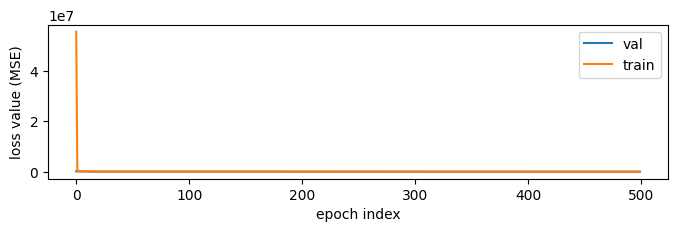

In [ ]:
# QC training and validation curves (should follow eachother)
plt.figure(figsize=(8,2))
plt.plot(results.history['val_loss'], label='val')
plt.plot(results.history['loss'], label='train')
plt.xlabel('epoch index')
plt.ylabel('loss value (MSE)')
plt.legend()
plt.show()


In [ ]:
#encoded_test = np.array(encoder.predict(np.array(svm_test2)))
vae_test = vae.predict(np.array(X_test_chatter))
vae_test

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[ 0.93610394,  1.3399373 ,  1.1695819 , ..., -0.14844003,
         0.07946431, -0.5688245 ],
       [ 0.04553369,  0.45528147,  0.23200966, ..., -0.45757097,
        -0.34184048, -0.81085616],
       [ 0.2630911 ,  0.25553185, -0.7987524 , ..., -0.71497476,
        -0.55691695, -0.5798065 ],
       ...,
       [-0.26683795, -0.48341045, -1.1167164 , ..., -0.2747348 ,
        -0.4691929 ,  0.04962463],
       [-0.10152639, -0.03181163, -0.6409054 , ...,  0.02336227,
         0.06058809,  0.22071745],
       [-0.53841263,  0.23503083, -0.15776455, ...,  0.48539123,
         0.35471508, -0.27087802]], dtype=float32)

In [ ]:
X_test_chatter

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
275,1.922543,1.682538,1.964512,1.964512,1.964512,1.964512,1.964512,1.947551,1.151867,1.964512,...,-1.485208,-0.084590,1.019096,1.964512,1.964512,1.964512,1.082641,0.595602,-1.112139,-1.438881
1343,0.104639,1.534189,-0.042187,-0.333439,0.841464,-0.394933,-0.676873,0.480929,-0.829673,0.031782,...,-0.051734,-0.096127,0.632206,0.095502,0.359813,0.544005,-0.060577,-0.335664,0.177730,-0.594470
1119,0.377032,0.306928,-0.763493,-1.146166,-0.886482,-1.770661,-0.661235,-0.234461,0.138549,0.531881,...,-0.201898,0.434134,1.674514,-0.364537,-0.059992,-0.045936,-1.682401,-1.712094,-0.716639,-1.224762
1787,-0.235515,0.296971,0.659029,0.805621,0.230732,0.047419,-0.309192,-0.778778,-1.133281,-0.628965,...,0.432436,-0.197213,0.480870,0.081446,0.567197,0.246897,1.057340,-0.124005,-0.028131,-1.039751
1365,0.600053,-0.315752,0.504004,-0.044706,-0.704633,-0.421991,-1.656807,-1.886447,-0.196393,-0.803376,...,1.964512,1.964512,1.964512,1.964512,1.964512,1.964512,1.947493,0.820966,0.483213,-0.187022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,-0.018351,0.195651,0.785884,0.154010,-0.047224,0.254393,-0.524541,-0.212323,-0.059113,-0.288401,...,-0.495668,-0.167695,-0.186554,0.403269,-0.087225,0.439171,0.250704,-0.429019,-0.300583,-0.556870
169,-1.961236,-0.092145,-0.743170,0.209883,1.804824,1.235324,0.783190,0.107567,-1.605386,-1.114716,...,-0.652040,-0.987099,-1.888614,1.964512,-1.292465,-1.273021,-0.047224,1.746199,1.612141,1.260156
1779,-0.611571,-0.278386,-1.138904,-0.174489,-0.593591,-0.615319,-0.083008,0.269913,-0.626271,0.750042,...,0.164552,-0.586329,-0.430601,-1.423420,-1.178553,-0.858195,-0.747562,-0.402840,0.073540,-0.264330
715,0.090993,-0.086991,-1.280049,-1.679004,-0.781355,-0.825690,0.537035,0.680055,0.738036,1.423908,...,0.479582,0.503535,1.425314,-0.805895,0.517650,-0.458947,-0.953189,-0.092379,-0.180112,0.070495


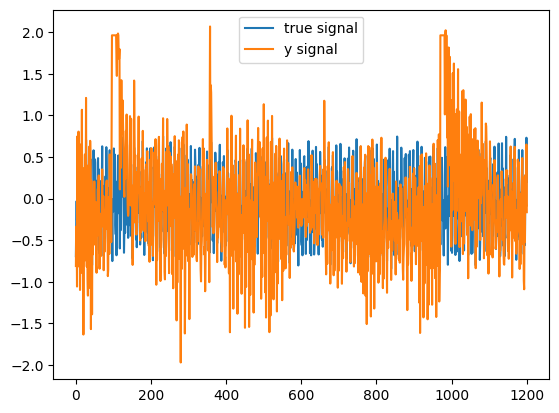

In [ ]:
#plt.plot(np.array(X_stable)[2],label='true signal')
plt.plot(np.array(vae_test)[15],label='true signal')
plt.plot(np.array(X_test_chatter)[15],label='y signal')
#plt.plot(vae_test[0],label='encoded-decoded signal')
plt.legend()
plt.show()

In [ ]:
X_stable = np.concatenate((X_train_stable,X_test_stable),axis=0)
X_chatter = np.concatenate((X_train_chatter,X_test_chatter),axis=0)

In [ ]:
vae_generated_stable = vae.predict(X_stable)
#vae_generated_stable = scaler_chatter.inverse_transform(vae_generated_stable)
vae_generated_stable = pd.DataFrame(vae_generated_stable)
vae_generated_stable

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,-1.247119,-0.658239,-1.002723,-1.201698,-0.626322,-1.177194,-1.079080,-0.660064,-1.223737,-0.978103,...,-1.050704,-1.125739,-0.571560,-1.097375,-1.057637,-0.684252,-1.230707,-0.927904,-0.683271,-1.246336
1,-1.034921,-0.662463,-1.287324,-0.986255,-0.746049,-1.341429,-0.806382,-0.849832,-1.280061,-0.684462,...,-1.302523,-0.868230,-0.677421,-1.310598,-0.772808,-0.908920,-1.335207,-0.691635,-0.977430,-1.249920
2,-1.014696,-0.614843,-1.251989,-0.942685,-0.678279,-1.296831,-0.808196,-0.770398,-1.281240,-0.697602,...,-1.239281,-0.905472,-0.687081,-1.255985,-0.782589,-0.858866,-1.302649,-0.765889,-0.965221,-1.258315
3,-1.193477,-0.764640,-0.752227,-1.207627,-0.695848,-0.879910,-1.218636,-0.616375,-0.944635,-1.112388,...,-0.768159,-1.139987,-0.626775,-0.813158,-1.147579,-0.633516,-0.986299,-1.103421,-0.582606,-1.065968
4,-0.810190,-1.345667,-0.772311,-0.914815,-1.313296,-0.688558,-1.100073,-1.197142,-0.561146,-1.124901,...,-0.712727,-0.923697,-1.246542,-0.666775,-1.068555,-1.241235,-0.669744,-1.143107,-1.121638,-0.650921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,-1.199405,-0.603859,-0.975666,-1.168803,-0.588212,-1.142226,-1.032542,-0.608088,-1.162683,-0.921014,...,-0.997260,-1.065512,-0.515260,-1.063552,-1.003945,-0.620328,-1.202586,-0.925829,-0.630563,-1.206069
949,-0.681696,-0.597369,-1.176980,-0.617172,-0.760493,-1.203288,-0.533086,-0.895164,-1.047799,-0.397452,...,-1.202046,-0.535123,-0.669273,-1.141198,-0.446937,-0.946682,-1.066153,-0.478908,-1.046918,-0.964586
950,-1.080897,-1.204333,-0.618143,-1.153816,-1.097029,-0.633976,-1.320615,-1.010325,-0.632131,-1.327054,...,-0.623405,-1.161940,-1.037467,-0.627989,-1.260358,-0.994453,-0.721050,-1.241086,-0.814595,-0.807265
951,-1.093330,-0.561707,-1.147600,-1.042158,-0.587064,-1.251155,-0.897575,-0.646208,-1.253838,-0.755356,...,-1.122711,-0.969429,-0.591398,-1.183944,-0.892129,-0.728412,-1.265786,-0.855031,-0.818443,-1.255143


In [ ]:
vae_generated_chatter = vae.predict(X_chatter)
#vae_generated_chatter = scaler_chatter.inverse_transform(vae_generated_chatter)
vae_generated_chatter = pd.DataFrame((vae_generated_chatter))
vae_generated_chatter

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,0.503809,0.668056,0.185039,0.330226,-0.042543,-0.665721,-0.254632,-0.430536,-0.531415,0.222507,...,-0.430825,0.234815,0.297519,0.214371,0.871276,0.344799,-0.039269,0.215087,-0.358992,-0.464546
1,1.053986,0.888298,-0.018872,0.058817,-0.553694,-1.113668,-0.793875,-0.655930,-0.586679,0.719684,...,-0.552607,0.828006,1.092998,0.734656,1.333362,0.284504,-0.623581,-0.094510,-0.866790,-0.835775
2,-0.770222,-1.247188,-0.457495,-0.375940,-0.056821,0.947299,1.250625,0.763853,0.770108,0.113301,...,0.757292,0.097910,-0.649027,-1.050137,-0.998205,-0.703596,-0.088969,0.373958,0.908917,1.361063
3,1.113125,0.660642,-0.000367,-0.040872,-0.594140,-1.026506,-0.745788,-0.624696,-0.450099,0.620807,...,-0.456832,0.750122,0.993291,0.728667,1.228396,0.109250,-0.572858,-0.143555,-0.852503,-0.691564
4,0.799404,0.088068,0.153921,-0.061041,-0.548115,-0.233107,-0.005679,-0.213023,0.406193,0.452800,...,0.418285,0.558966,0.294640,0.660639,0.391865,-0.341706,-0.026764,0.022756,-0.378540,0.100205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,-0.118947,-0.240552,0.336720,-0.309960,-0.495066,-0.276007,-0.798900,-0.575996,-0.133440,-0.461488,...,-0.069356,-0.459398,-0.182916,0.242108,-0.221699,-0.013867,-0.071164,-0.676864,-0.403845,-0.401174
949,-0.448530,-0.199130,-0.540590,0.439760,0.671819,0.185687,0.774908,0.258626,-0.498812,-0.228002,...,-0.718723,-0.403309,-0.468547,-1.070159,-0.109657,-0.300353,-0.212197,0.824482,0.218042,0.197422
950,-0.293851,-0.473391,-1.100358,-0.265876,-0.620810,-0.628168,0.197359,-0.094700,-0.154754,0.480223,...,-0.274375,0.433020,-0.226533,-0.839944,-0.119775,-0.765365,-0.709446,-0.289550,-0.471074,0.023602
951,-0.082612,-0.053637,-0.634518,-0.433149,0.026871,-0.341630,0.744611,0.908290,0.459272,0.967162,...,0.480696,0.806414,0.765780,-0.546784,-0.253951,-0.072553,-0.793294,0.058317,0.059350,0.263585


In [ ]:
X_stable2 = pd.DataFrame(X_stable)
X_chatter2 = pd.DataFrame(X_chatter)

In [ ]:
chatter_svm_ch2 = vae_generated_chatter.iloc[8:80]

stable_svm_all = pd.concat([X_stable2], axis=0)
stable_svm_all = stable_svm_all.reset_index(drop=True)

stable_svm_train = stable_svm_all.iloc[0:800]
stable_svm_test = stable_svm_all.iloc[753:953]

chatter_svm_train_o = X_chatter2.iloc[0:8]
chatter_svm_test = X_chatter2.iloc[753:953]

stable_svm_train_label = np.full((800, 1), 1)
chatter_svm_train_o_label = np.full((8, 1), 2)

stable_svm_test_label = np.full((200, 1), 1)
chatter_svm_test_o_label = np.full((200, 1), 2)

svm_train = pd.concat([stable_svm_train, chatter_svm_train_o], axis=0)
svm_train = svm_train.reset_index(drop=True)

svm_test = pd.concat([stable_svm_test, chatter_svm_test], axis=0)
svm_test = svm_test.reset_index(drop=True)

svm_train_label = np.concatenate((stable_svm_train_label, chatter_svm_train_o_label), axis=0)
svm_test_label = np.concatenate((stable_svm_test_label, chatter_svm_test_o_label), axis=0)




In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(svm_train)
X_test_svm = scaler.transform(svm_test)

Parameters: C=100, kernel='poly,'degree=1, gamma='auto', Accuracy=0.57
Parameters: C=100, kernel='poly,'degree=1, gamma='scale', Accuracy=0.57
Parameters: C=1000, kernel='poly,'degree=1, gamma='auto', Accuracy=0.57
Parameters: C=1000, kernel='poly,'degree=1, gamma='scale', Accuracy=0.57

In [ ]:
X_train.shape

(1524, 1202)

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

clf = svm.SVC(kernel = "poly",C=1,degree=2,gamma = 'auto')

# Fit the classifier on the training data
clf.fit(X_train_svm, svm_train_label)

# Predict the labels for the test data
predictions = clf.predict(X_test_svm)

# Calculate the accuracy of the SVM classifier
accuracy = accuracy_score(svm_test_label, predictions)
print(accuracy)
print(classification_report(svm_test_label,predictions))

0.945
              precision    recall  f1-score   support

           1       0.90      1.00      0.95       200
           2       1.00      0.89      0.94       200

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.94       400
weighted avg       0.95      0.94      0.94       400



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
data2 = scipy.io.loadmat('TrainingDataandLabels.mat')
#1201-130-non_norm-shuffled.mat
x2= data2['flow']
print(x2.shape)
y2 = data2 ["labels"]
print(y2.shape)

(1201, 1906)
(1, 1906)


In [ ]:
data2 = scipy.io.loadmat('1201-130-non_norm-shuffled.mat')
x2 = data2['shuffled']
print(x.shape)
y2 = data2 ["shuffled_labels"]
print(y2.shape)

(1201, 1906)
(1, 1906)


In [ ]:
x_transposed2 = np.transpose(x2)
y_transposed2 = np.transpose(y2)
df12 = pd.DataFrame(x_transposed2)
df22 = pd.DataFrame(y_transposed2, columns = ["Labels"])

In [ ]:
dff2 = pd.concat([df12, df22], axis=1)
dff2

,0,1,2,3,4,5,6,7,8,9,...,1192,1193,1194,1195,1196,1197,1198,1199,1200,Labels
0,-0.033332,-0.085857,-0.073185,-0.011171,0.056423,0.077605,0.061338,0.019678,-0.033606,-0.063481,...,0.033123,0.015099,0.000589,-0.018546,-0.040237,-0.015751,0.042935,0.056025,0.038771,1
1,-0.014934,-0.088185,-0.089303,0.003536,0.094426,0.097737,0.001465,-0.089163,-0.067931,0.037376,...,-0.003062,-0.013477,-0.004117,0.016143,0.013687,-0.005675,-0.019226,-0.013902,-0.001791,1
2,-0.012245,-0.046522,-0.058433,-0.033209,0.028661,0.063720,0.029545,-0.035015,-0.066762,-0.048157,...,0.240375,0.118871,-0.086310,-0.169833,-0.094856,-0.019909,-0.043971,-0.083824,-0.059989,1
3,0.030949,0.039864,-0.009889,-0.033550,-0.002050,0.039342,0.017993,-0.020063,-0.015736,0.009792,...,0.057509,0.030321,-0.017843,-0.052160,-0.061638,-0.054184,-0.034421,-0.013585,-0.003385,1
4,0.021610,-0.019919,-0.047801,-0.043151,0.000843,0.047561,0.064020,0.024550,-0.017988,-0.020041,...,-0.023563,-0.028223,-0.001192,0.021194,0.020908,0.007241,-0.014940,-0.029013,-0.012556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,-0.214760,-0.137189,0.063628,0.216979,0.117362,-0.129971,-0.232769,-0.011466,0.174400,-0.002492,...,-0.118097,-0.043695,0.006463,0.140691,0.270375,0.176057,-0.097308,-0.215748,-0.107130,2
1902,0.003860,-0.026346,-0.026933,0.052409,0.137214,0.110519,0.018412,-0.066092,-0.096759,-0.095694,...,-0.117109,0.051782,0.184129,0.167420,-0.024256,-0.158296,-0.118841,-0.028036,-0.038221,2
1903,-0.162564,-0.255623,-0.029582,0.252611,0.207382,-0.117210,-0.253825,-0.149713,0.076848,0.185937,...,0.098490,0.375954,0.404241,0.189033,-0.067160,-0.242110,-0.321250,-0.366230,-0.392366,2
1904,0.240359,0.231626,0.115252,-0.129998,-0.359195,-0.402580,-0.270478,-0.083559,0.061900,0.162378,...,0.102809,0.273305,0.374406,0.391519,0.281850,0.026974,-0.250276,-0.403238,-0.356164,2


In [ ]:
vae_generated_chatter

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,0.503809,0.668056,0.185039,0.330226,-0.042543,-0.665721,-0.254632,-0.430536,-0.531415,0.222507,...,-0.430825,0.234815,0.297519,0.214371,0.871276,0.344799,-0.039269,0.215087,-0.358992,-0.464546
1,1.053986,0.888298,-0.018872,0.058817,-0.553694,-1.113668,-0.793875,-0.655930,-0.586679,0.719684,...,-0.552607,0.828006,1.092998,0.734656,1.333362,0.284504,-0.623581,-0.094510,-0.866790,-0.835775
2,-0.770222,-1.247188,-0.457495,-0.375940,-0.056821,0.947299,1.250625,0.763853,0.770108,0.113301,...,0.757292,0.097910,-0.649027,-1.050137,-0.998205,-0.703596,-0.088969,0.373958,0.908917,1.361063
3,1.113125,0.660642,-0.000367,-0.040872,-0.594140,-1.026506,-0.745788,-0.624696,-0.450099,0.620807,...,-0.456832,0.750122,0.993291,0.728667,1.228396,0.109250,-0.572858,-0.143555,-0.852503,-0.691564
4,0.799404,0.088068,0.153921,-0.061041,-0.548115,-0.233107,-0.005679,-0.213023,0.406193,0.452800,...,0.418285,0.558966,0.294640,0.660639,0.391865,-0.341706,-0.026764,0.022756,-0.378540,0.100205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,-0.118947,-0.240552,0.336720,-0.309960,-0.495066,-0.276007,-0.798900,-0.575996,-0.133440,-0.461488,...,-0.069356,-0.459398,-0.182916,0.242108,-0.221699,-0.013867,-0.071164,-0.676864,-0.403845,-0.401174
949,-0.448530,-0.199130,-0.540590,0.439760,0.671819,0.185687,0.774908,0.258626,-0.498812,-0.228002,...,-0.718723,-0.403309,-0.468547,-1.070159,-0.109657,-0.300353,-0.212197,0.824482,0.218042,0.197422
950,-0.293851,-0.473391,-1.100358,-0.265876,-0.620810,-0.628168,0.197359,-0.094700,-0.154754,0.480223,...,-0.274375,0.433020,-0.226533,-0.839944,-0.119775,-0.765365,-0.709446,-0.289550,-0.471074,0.023602
951,-0.082612,-0.053637,-0.634518,-0.433149,0.026871,-0.341630,0.744611,0.908290,0.459272,0.967162,...,0.480696,0.806414,0.765780,-0.546784,-0.253951,-0.072553,-0.793294,0.058317,0.059350,0.263585


In [ ]:
Xchatter = dff2[dff2["Labels"]==2].iloc[:,0:1201]
Xstable = dff2[dff2["Labels"]==1].iloc[:,0:1201]

stable_svm_all = pd.concat([Xstable,vae_generated_stable], axis=0)
stable_svm_all = stable_svm_all.reset_index(drop=True)

chatter_svm_ch3 = vae_generated_chatter[8:160] #generated 392

svm3_stable_train = stable_svm_all[0:800] #stable train 800
svm3_stable_test = stable_svm_all[753:953] #stable test 200

svm3_chatter_train = Xchatter[0:8] #original chatter train 8

svm3_chatter_test = Xchatter[753:953] #chatter test 200

stable_svm3_train_label = np.full((800, 1), 1) # stable train labeling
chatter_svm3_train_o_label = np.full((160, 1), 2) #chatter train labeling

stable_svm3_test_label = np.full((200, 1), 1) # stable test labeling
chatter_svm3_test_o_label = np.full((200, 1), 2) #chatter test labeling

svm3_train = pd.concat([svm3_stable_train, svm3_chatter_train,chatter_svm_ch3], axis=0) #concatting all train datas
svm3_train = svm3_train.reset_index(drop=True)

svm3_test = pd.concat([svm3_stable_test, svm3_chatter_test], axis=0) #concatting all test datas
svm3_test = svm3_test.reset_index(drop=True)

svm3_train_label = np.concatenate((stable_svm3_train_label, chatter_svm3_train_o_label), axis=0)
svm3_test_label = np.concatenate((stable_svm3_test_label, chatter_svm3_test_o_label), axis=0)



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler3 = StandardScaler()
X_train_svm3 = scaler3.fit_transform(svm3_train)
X_test_svm3 = scaler3.transform(svm3_test)

In [ ]:
X_train_svm3.shape

(960, 1201)

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel = "poly",C=1,degree=2,gamma = 'auto')

# Fit the classifier on the training data
clf.fit(X_train_svm3, svm3_train_label)

# Predict the labels for the test data
predictions = clf.predict(X_test_svm3)

# Calculate the accuracy of the SVM classifier
accuracy = accuracy_score(svm3_test_label, predictions)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.83

In [ ]:
 X_train_wl = np.array(X_train_wl)
 X_train_wl=X_train_wl.reshape((X_train_wl.shape[0], X_train_wl.shape[1], 1))

In [ ]:
X_test_wl = np.array(X_test_wl)
X_test_wl=X_test_wl.reshape((X_test_wl.shape[0], X_test_wl.shape[1], 1))
X_test_wl.shape

(382, 1201, 1)

In [ ]:
encoded_test = np.array(encoder.predict(np.array(X_test_wl)))
vae_test = vae.predict(np.array(X_test_wl))
vae_test